# **Sales Prediction based on Advertising Data**

Group 4
1. Syahel Rusfi Razaba
2. Raden Achmad Zildhan F. B
3. Nazwa Syabina
4. Irvanza Huga Fausta
5. Muhammad Zaky Himawan

## **Study Case**
Seorang pengusaha produk kesehatan, sedang mengalami problem pada penjualan yang terus menurun. Padahal dia telah melakukan berbagai strategi agar produknya bisa terjual dengan baik. Pengusaha tersebut memiliki dataset csv tentang kolom penjualan dan kolom iklan. Sebagai seorang machine learning engineer, apa yang akan kalian lakukan supaya dapat memberikan prediksi hubungan antara penjualan dan iklan kepada Pengusaha tersebut?

## **Goals**
Memprediksi penjualan berdasarkan pengiklanan produk dibeberapa platform

## **Objectives**
1.   Membuat model regresi linear untuk memprediksi penjualan
2.   Apakah iklan di TV, Billboards, Google Ads, Social Media, Influencer Marketing, dan Affiliate Marketing berpengaruh terhadap naik turunnya penjualan?
3.   Identifikasi platform-platform yang berpotensi memberikan keuntungan dalam promosi produk.



## **Data Preparation and Pre-Processing**

**Load Dataset**

In [ ]:
import pandas as pd # Import library yang dibutuhkan
url_data = 'https://raw.githubusercontent.com/syahelrusfi21/Sales-Prediction-based-on-Advertising-Data/main/Advertising_Data.csv' # url dataset raw dari github
data = pd.read_csv(url_data) # Loading data
print(data.shape)
data.head()

(300, 7)


,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
0,281.42,538.80,123.94,349.30,242.77,910.10,7164.0
1,702.97,296.53,558.13,180.55,781.06,132.43,5055.0
2,313.14,295.94,642.96,505.71,438.91,464.23,6154.0
3,898.52,61.27,548.73,240.93,278.96,432.27,5480.0
4,766.52,550.72,651.91,666.33,396.33,841.93,9669.0


**Data Understanding**

Varaibel Dependen/Target
*   Product_Sold: Berisi informasi mengenai jumlah unit produk yang terjual.

Variabel Independen/Prediktor

Berisi informasi mengenai biaya (*cost*) yang harus dikeluarkan untuk periklanan melalui suatu platform.
*   TV
*   Billboards
*   Google_Ads
*   Social_Media
*   Influencer_Marketing
*   Affiliate_Marketing





In [ ]:
# Melihat informasi data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TV                    300 non-null    float64
 1   Billboards            300 non-null    float64
 2   Google_Ads            300 non-null    float64
 3   Social_Media          300 non-null    float64
 4   Influencer_Marketing  300 non-null    float64
 5   Affiliate_Marketing   300 non-null    float64
 6   Product_Sold          300 non-null    float64
dtypes: float64(7)
memory usage: 16.5 KB


In [ ]:
# Mengecek duplikasi data
data_duplicated = data.duplicated().sum()
print('Jumlah data duplikat:', data_duplicated)

Jumlah data duplikat: 0


In [ ]:
# Mengecek missing value
data.isnull().sum()

TV                      0
Billboards              0
Google_Ads              0
Social_Media            0
Influencer_Marketing    0
Affiliate_Marketing     0
Product_Sold            0
dtype: int64

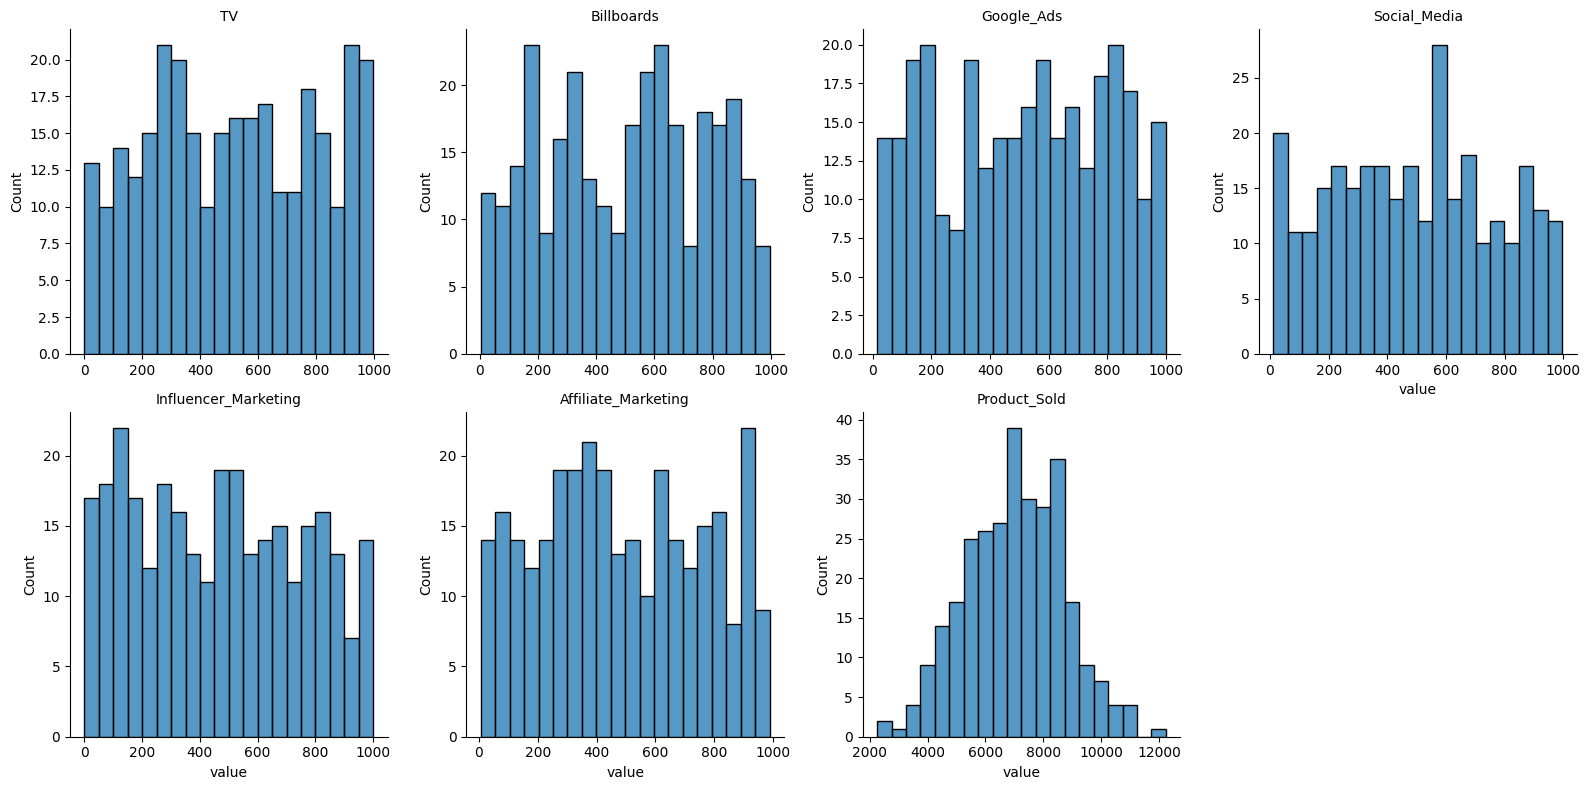

In [ ]:
# Mengecek noise dan outlier melalui visualisasi histogram

# Import library yang dibutuhkan
import seaborn as sns
import matplotlib.pyplot as plt

# Variabel yang ingin divisualisasikan
variables = ['TV', 'Billboards', 'Google_Ads', 'Social_Media', 'Influencer_Marketing', 'Affiliate_Marketing', 'Product_Sold']

# Inisialisasi grid subplot menggunakan FacetGrid
grid = sns.FacetGrid(data.melt(value_vars=variables, var_name='Variable'), col='Variable', col_wrap=4, sharex=False, sharey=False, height=4)

# Memplot histogram untuk setiap variabel
grid.map(sns.histplot, 'value', bins=20)

# Mengatur judul untuk setiap subplot
grid.set_titles(col_template="{col_name}")

# Menampilkan plot
plt.show()

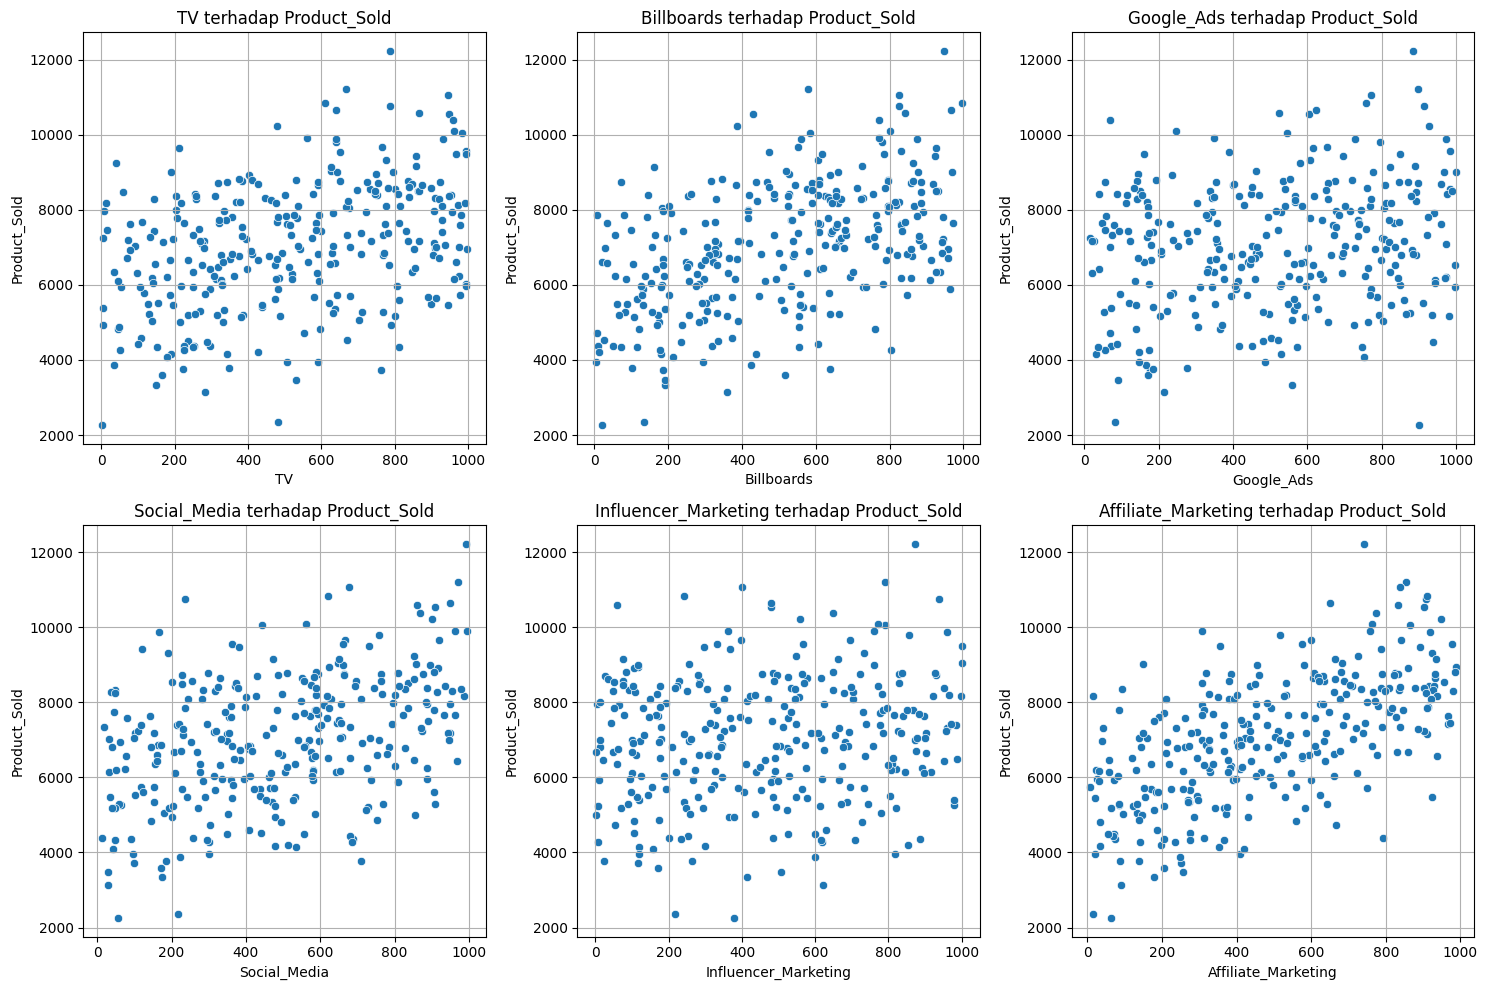

In [ ]:
# Visualisasi scatter plot
iklan = ['TV', 'Billboards', 'Google_Ads', 'Social_Media', 'Influencer_Marketing', 'Affiliate_Marketing']

# Membuat subplot untuk setiap variabel iklan terhadap Product_Sold
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, ad in enumerate(iklan):
    row = i // 3
    col = i % 3
    sns.scatterplot(x=data[ad], y=data['Product_Sold'], ax=axes[row, col])
    axes[row, col].set_title(f'{ad} terhadap Product_Sold')
    axes[row, col].set_xlabel(ad)
    axes[row, col].set_ylabel('Product_Sold')
    axes[row, col].grid(True)

plt.tight_layout()
plt.show()


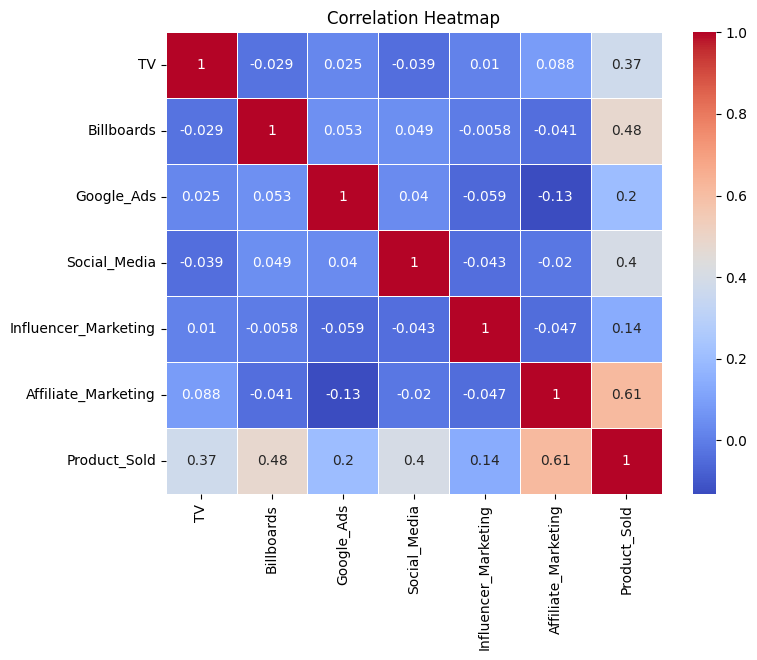

In [ ]:
# Melihat korelasi antar-variabel
correlation_matrix = data.corr()

# Visualisasi Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Berdasarkan visualisasi diatas, terlihat bahwa korelasi antar-variabel bebasnya tidak ada yang melebihi 0.8, artinya disini tidak terjadi multikolinearitas. Sehingga kita bisa lanjut ke tahap pemodelan.

In [ ]:
# Melihat statistika deskriptif dari data
data.describe()

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,517.431000,502.644933,512.444133,489.800100,465.732567,484.430633,7031.523333
std,288.114792,275.842369,285.422376,273.883915,288.314080,277.955458,1703.614951
min,1.040000,3.630000,14.860000,11.690000,0.770000,6.740000,2259.000000
25%,273.090000,277.912500,250.530000,265.612500,214.480000,267.677500,5922.500000
50%,513.970000,533.020000,528.965000,486.385000,480.355000,451.315000,7051.000000
75%,774.275000,745.005000,763.345000,695.117500,703.092500,721.065000,8278.000000
max,998.100000,995.320000,999.230000,996.160000,999.830000,987.580000,12227.000000


In [ ]:
# Melakukan normalisasi data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)
scaled_df.head()

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
0,0.281207,0.539655,0.110812,0.342936,0.242228,0.921006,0.492075
1,0.704000,0.295354,0.551896,0.171524,0.781024,0.128145,0.280498
2,0.313020,0.294759,0.638073,0.501813,0.438552,0.466427,0.390750
3,0.900126,0.058123,0.542347,0.232856,0.278452,0.433842,0.323134
4,0.767737,0.551674,0.647165,0.664967,0.395932,0.851505,0.743379


In [ ]:
# Statistika deskriptif hasil normalisasi data
scaled_df.describe()

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.517914,0.503196,0.505485,0.485652,0.465400,0.487022,0.478784
std,0.288964,0.278154,0.289954,0.278204,0.288585,0.283385,0.170908
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272852,0.276581,0.239412,0.257928,0.213911,0.266035,0.367526
50%,0.514442,0.533826,0.522268,0.482183,0.480036,0.453259,0.480738
75%,0.775515,0.747587,0.760370,0.694209,0.702983,0.728279,0.603832
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## **Data Modelling**

In [ ]:
# Import library yang dibutuhkan
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Menentukan variabel dependen (y) dan variabel independen (x)
x = scaled_df.drop('Product_Sold', axis=1)
y = scaled_df['Product_Sold']

# Membagi data menjadi data latih (train) dan data uji (test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (210, 6)
x_test shape: (90, 6)
y_train shape: (210,)
y_test shape: (90,)


In [ ]:
# Membuat model regresi linear
model = LinearRegression()

# Melatih model
model.fit(x_train, y_train)

# Tampilkan koefisien (slope) dari setiap fitur
print("Koefisien (slope):", model.coef_)

# Tampilkan intersep (intercept) dari model
print("Intersep (intercept):", model.intercept_)

Koefisien (slope): [0.20025013 0.29825629 0.14799131 0.24681321 0.12013068 0.39324513]
Intersep (intercept): -0.21715817057268577


## **Model Evaluation**

In [ ]:
# Import library yang dibutuhkan
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Melakukan prediksi berdasarkan data uji
y_pred = model.predict(x_test)

# Melakukan evaluasi model dengan metrik Mean Absolute Error, Mean Square Error, dan R-squared
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error: 0.0008322734331092896
Mean Squared Error: 1.0241796771915838e-06
R-squared (R2) Score: 0.9999659903345287


Keterbatasan *scikit-learn* ialah tidak tersedianya fungsi untuk menghitung p-value, sehingga akan lebih lama untuk mencari secara manual. Maka dari itu, Kita akan coba untuk melihat summary dari output modelnya menggunakan library *statsmodel.api*.

In [ ]:
import statsmodels.api as sm

# Persiapkan data
X = x_train  # Variabel independen
Y = y_train    # Variabel dependen

# Tambahkan kolom konstanta
X = sm.add_constant(X)

# Inisialisasi dan latih model
model = sm.OLS(Y, X)
results = model.fit()

# Tampilkan summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Product_Sold   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.957e+05
Date:                Wed, 27 Mar 2024   Prob (F-statistic):               0.00
Time:                        00:29:03   Log-Likelihood:                 1144.4
No. Observations:                 210   AIC:                            -2275.
Df Residuals:                     203   BIC:                            -2251.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2172 

Pada output diatas, fokus kita untuk mendapatkan fitur-fitur (variabel) yang berpengaruh signifikan terhadap variabel terikat. Terlihat bahwa nilai *p-value* (P>|t|) yang mendekati 0, artinya variabel-variabel tersebut signifikan pada taraf signifikansi 5% atau bahkan 1%. Selain itu ada informasi mengenai *R-squared* = 1. Hal ini mengindikasikan bahwa model yang kita buat sudah sangat baik, karena semua variabel bebasnya berpengaruh signifikan terhadap variabel tak bebas dan nilai *R-squared* yang besar (mendekati 1) menandakan semakin baik model dapat menjelaskan variasi dalam data. Sehingga persamaan regresi dari model terbaik ialah

**Product_Sold = -0.2172 + 0.2003 (TV) + 0.2983 (Billboards) + 0.1480 (Google_Ads) + 0.2468 (Social_Media) + 0.1201 (Influencer_Marketing) + 0.3932 (Affiliate_Marketing)**





## **Conclusion**
Berdasarkan hasil analisis yang telah dilakukan, diperoleh model regresi sebagai berikut:

**Product_Sold = -0.2172 + 0.2003 (TV) + 0.2983 (Billboards) + 0.1480 (Google_Ads) + 0.2468 (Social_Media) + 0.1201 (Influencer_Marketing) + 0.3932 (Affiliate_Marketing)**

dengan nilai

Mean Absolute Error: 0.0008322734331092896

Mean Squared Error: 1.0241796771915838e-06

R-squared (R2) Score: 0.9999659903345287

Maka, dapat disimpulkan bahwa iklan melalui TV, Billboards, Google Ads, Social Media, Influencer Marketing, dan Affiliate Marketing memiliki pengaruh terhadap peningkatan atau penurunan penjualan produk. Oleh karena itu, disarankan untuk mempertimbangkan penggunaan platform-platform tersebut dalam strategi pemasaran produk, terutama dalam hal Affiliate Marketing yang berpotensi memberikan keuntungan yang signifikan.